In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("C:/Users/15341/Desktop/HNBPROJ/Kau/final/final_data_with_Loan.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

C:\Users\15341\AppData\Local\Temp\ipykernel_21764\4150579324.py:5: DtypeWarning: Columns (2,30,31,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/15341/Desktop/HNBPROJ/Kau/final/final_data_with_Loan.csv", encoding=encoding)


In [4]:
df=df[[
"REGION_CD",
"ACCOUNT_JOINT",
"NPA_FLAG",
"E_BANKING_ACCOUNTS",
"SOLO_ACCOUNTS",
"PAYFAST_ACCOUNT",
'LNAMOUNT']]

In [5]:
df.shape

(4549303, 7)

In [6]:
df.head(5)

,REGION_CD,ACCOUNT_JOINT,NPA_FLAG,E_BANKING_ACCOUNTS,SOLO_ACCOUNTS,PAYFAST_ACCOUNT,LNAMOUNT
0,3,NaN,NaN,NaN,NaN,NaN,NaN
1,10,NaN,Y,1.0,Y,NaN,11000000.0
2,1,NaN,NaN,1.0,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN
4,2,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df["LNAMOUNT"] = df["LNAMOUNT"].fillna(0)

In [8]:
df["ACCOUNT_JOINT"].fillna("N", inplace=True)

In [9]:
df["NPA_FLAG"].fillna("N", inplace=True)

In [10]:
df["SOLO_ACCOUNTS"].fillna("N", inplace=True)

In [11]:
df["PAYFAST_ACCOUNT"].fillna("N", inplace=True)

In [12]:
df["E_BANKING_ACCOUNTS"] = (df['E_BANKING_ACCOUNTS'] > 0).astype(int)

In [13]:
df['E_BANKING_ACCOUNTS'].replace({1: 'Y',  None: 'N'}, inplace=True)

In [14]:
df.isna().sum()

REGION_CD             0
ACCOUNT_JOINT         0
NPA_FLAG              0
E_BANKING_ACCOUNTS    0
SOLO_ACCOUNTS         0
PAYFAST_ACCOUNT       0
LNAMOUNT              0
dtype: int64

In [15]:
df.head()

,REGION_CD,ACCOUNT_JOINT,NPA_FLAG,E_BANKING_ACCOUNTS,SOLO_ACCOUNTS,PAYFAST_ACCOUNT,LNAMOUNT
0,3,N,N,0,N,N,0.0
1,10,N,Y,Y,Y,N,11000000.0
2,1,N,N,Y,N,N,0.0
3,3,N,N,0,N,N,0.0
4,2,N,N,0,N,N,0.0


In [16]:
bin_edges = [0,  100001, 500001,1000001,2000001,5000001,10000001, float('inf')]
bin_labels = [ "LNAMOUNT <=1 Lakh","1 Lakh < LNAMOUNT <= 5 Lakh",
              "5 Lakh < LNAMOUNT <= 1M","1M < LNAMOUNT <= 2M","2M < LNAMOUNT <= 5M","5M < LNAMOUNT <= 10M",'LNAMOUNT > 10M']


df['LNAMOUNT'] = pd.cut(df['LNAMOUNT'], bins=bin_edges, labels=bin_labels, right=False)

In [17]:
df.isna().sum()

REGION_CD             0
ACCOUNT_JOINT         0
NPA_FLAG              0
E_BANKING_ACCOUNTS    0
SOLO_ACCOUNTS         0
PAYFAST_ACCOUNT       0
LNAMOUNT              0
dtype: int64

In [24]:
import seaborn as sns
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return (phi2corr / min((kcorr - 1), (rcorr - 1)))**0.5

# Calculate Cramér's V for each pair of categorical variables
correlation_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
print("Cramér's V Correlation Matrix:")
print(correlation_matrix)



Cramér's V Correlation Matrix:
                   REGION_CD ACCOUNT_JOINT  NPA_FLAG E_BANKING_ACCOUNTS  \
REGION_CD                1.0      0.078072  0.048668            0.16696   
ACCOUNT_JOINT       0.078072      0.999998   0.04605           0.027012   
NPA_FLAG            0.048668       0.04605  0.999996           0.116544   
E_BANKING_ACCOUNTS   0.16696      0.027012  0.116544           0.999999   
SOLO_ACCOUNTS       0.100742      0.022913  0.022529           0.226971   
PAYFAST_ACCOUNT     0.046111      0.003702  0.139765           0.051482   
LNAMOUNT            0.082112       0.04463   0.41821           0.297498   

                   SOLO_ACCOUNTS PAYFAST_ACCOUNT  LNAMOUNT  
REGION_CD               0.100742        0.046111  0.082112  
ACCOUNT_JOINT           0.022913        0.003702   0.04463  
NPA_FLAG                0.022529        0.139765   0.41821  
E_BANKING_ACCOUNTS      0.226971        0.051482  0.297498  
SOLO_ACCOUNTS           0.999999        0.000078  0.218082  
PA

Cramér's V Correlation Matrix:
                    REGION_CD  ACCOUNT_JOINT  NPA_FLAG  E_BANKING_ACCOUNTS  \
REGION_CD            1.000000       0.078072  0.048668            0.166960   
ACCOUNT_JOINT        0.078072       0.999998  0.046050            0.027012   
NPA_FLAG             0.048668       0.046050  0.999996            0.116544   
E_BANKING_ACCOUNTS   0.166960       0.027012  0.116544            0.999999   
SOLO_ACCOUNTS        0.100742       0.022913  0.022529            0.226971   
PAYFAST_ACCOUNT      0.046111       0.003702  0.139765            0.051482   
LNAMOUNT             0.082112       0.044630  0.418210            0.297498   

                    SOLO_ACCOUNTS  PAYFAST_ACCOUNT  LNAMOUNT  
REGION_CD                0.100742         0.046111  0.082112  
ACCOUNT_JOINT            0.022913         0.003702  0.044630  
NPA_FLAG                 0.022529         0.139765  0.418210  
E_BANKING_ACCOUNTS       0.226971         0.051482  0.297498  
SOLO_ACCOUNTS            0.99

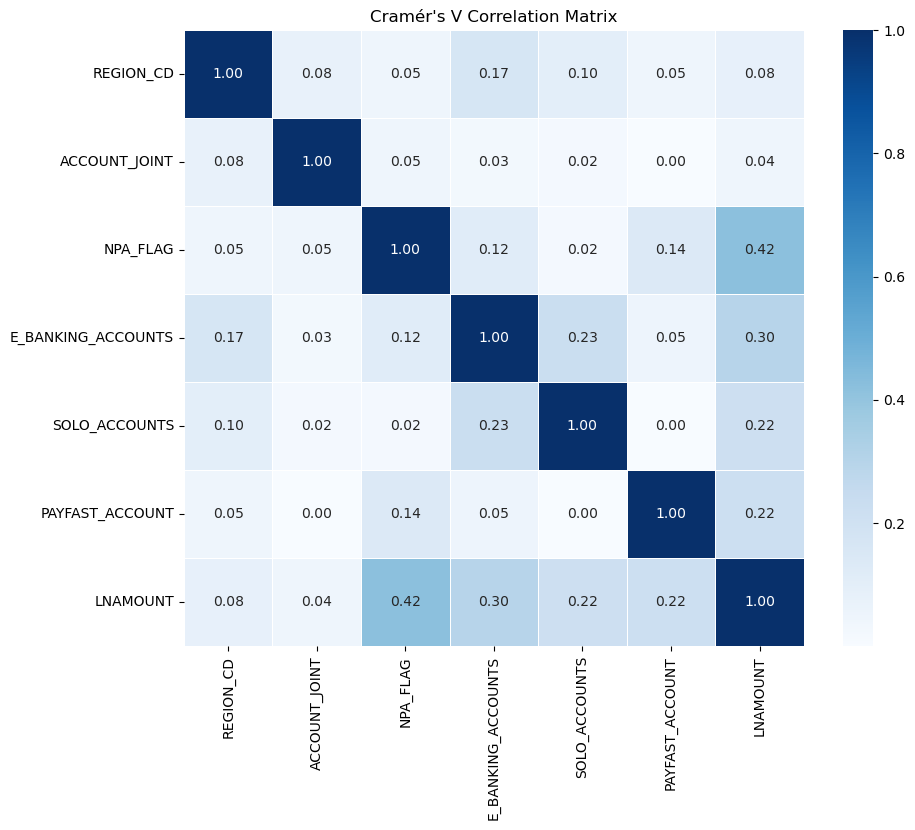

In [28]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return (phi2corr / min((kcorr - 1), (rcorr - 1)))**0.5

# Calculate Cramér's V for each pair of categorical variables
correlation_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert the correlation matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Display the correlation matrix
print("Cramér's V Correlation Matrix:")
print(correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)
plt.title("Cramér's V Correlation Matrix")
plt.show()